In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
df = pd.read_csv("C:/Users/Electronica Care/Desktop/Project/cleaned_sentiment_dataset.csv") 
df.head()


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df.set_index('Timestamp', inplace=True)

df = df.sort_index()

time_series = df['Likes']


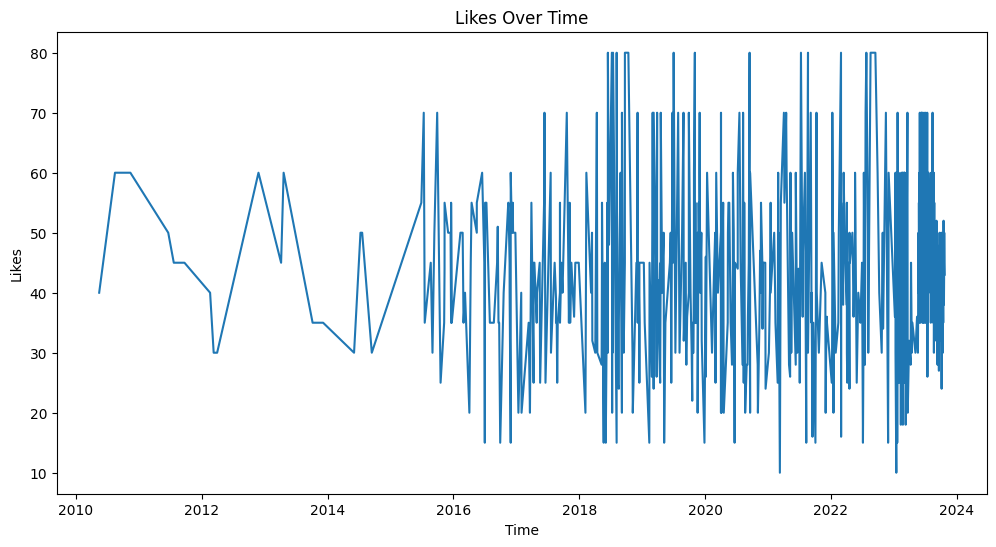

In [9]:
plt.figure(figsize=(12,6))
plt.plot(time_series)
plt.title("Likes Over Time")
plt.xlabel("Time")
plt.ylabel("Likes")
plt.show()


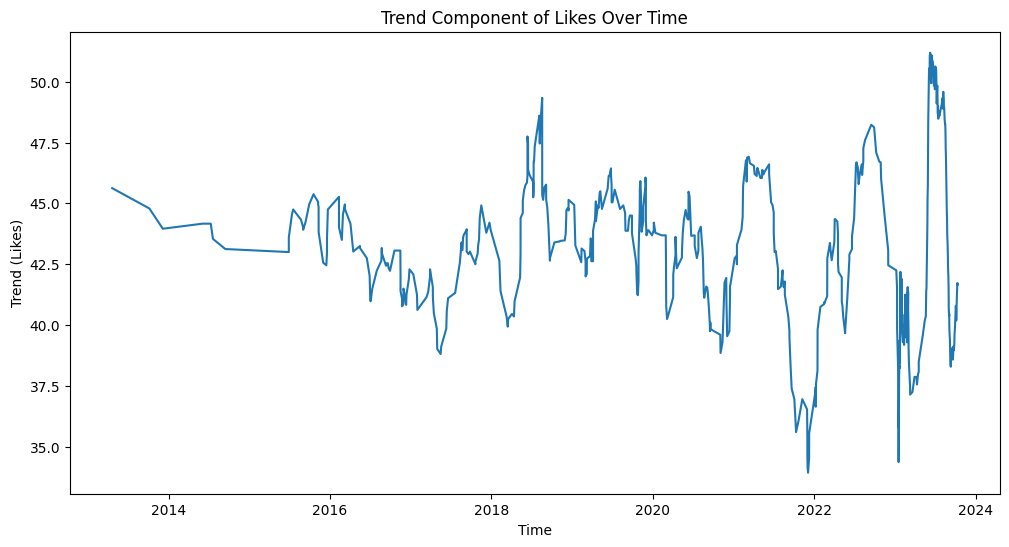

In [8]:
decomposition = seasonal_decompose(time_series, model='additive', period=24)

trend = decomposition.trend
plt.figure(figsize=(12,6))
plt.plot(trend)
plt.title("Trend Component of Likes Over Time")
plt.xlabel("Time")
plt.ylabel("Trend (Likes)")
plt.show()


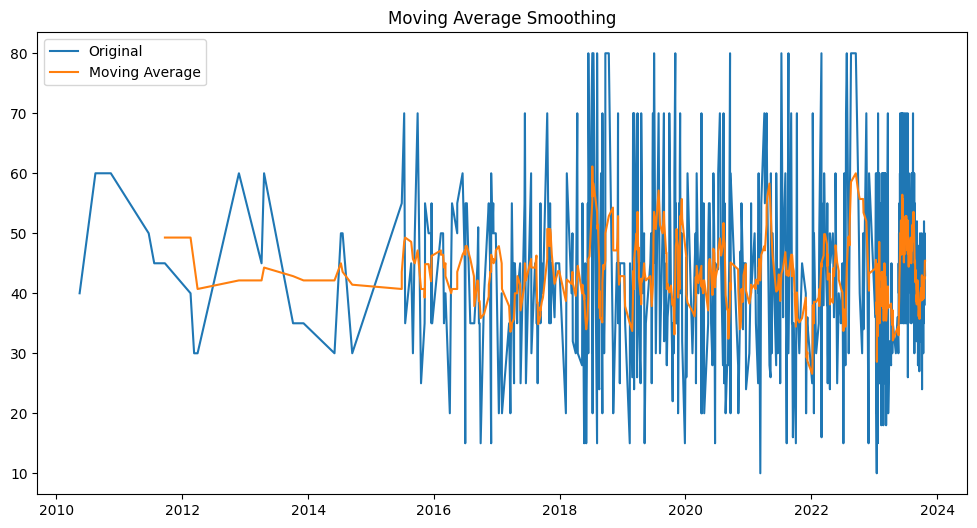

In [10]:
moving_avg = time_series.rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(time_series, label='Original')
plt.plot(moving_avg, label='Moving Average')
plt.legend()
plt.title("Moving Average Smoothing")
plt.show()
